In [232]:
import numpy as np
import pandas as pd
import sys
from pathlib import Path
sys.path.append('..') 
import platform
import os
from pathlib import Path
import shutil
from pathlib import Path
import shutil
from utils.behavior.session_utils import load_session_df, parse_session_string
from utils.behavior.lick_analysis import clean_up_licks, parse_lick_trains
from scipy.io import loadmat
from itertools import chain
from matplotlib import pyplot as plt
from IPython.display import display
from scipy.signal import find_peaks
from harp.clock import align_timestamps_to_anchor_points
from utils.basics.data_org import *
from utils.photometry.preprocessing import * 
from utils.photometry.plot_utils import align_signal_to_events, color_gradient
import numpy as np
from scipy.signal import butter, filtfilt, medfilt
from scipy.optimize import curve_fit
import json
from sklearn.linear_model import LinearRegression
from matplotlib.gridspec import GridSpec
import pickle
from aind_fip_dff.utils.preprocess import batch_processing, tc_triexpfit
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib widget

### Data preparation

In [121]:
session_list_A = get_session_list('photometry', 'all', 'crusIgood')
session_list_B = get_session_list('photometry_Gi', 'all', 'Gi_G8')
session_list = session_list_A + session_list_B

In [207]:
region_list = ['mPFC', 'TH', 'CrusI', 'Gi', 'LC']
session_data = {region: None for region in region_list}
session_data['session'] = session_list
iso = pd.DataFrame(session_data)
iso_mc = pd.DataFrame(session_data)
G = pd.DataFrame(session_data)
G_mc = pd.DataFrame(session_data)
for session in session_list:
    signal, _ = get_FP_data(session)
    session_df, licks_L, licks_R = load_session_df(session)
    parsed_licks_L, _ = parse_lick_trains(licks_L)
    parsed_licks_R, _ = parse_lick_trains(licks_R)
    regions = signal['G'].keys()
    for region in regions:
        # Iso
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['Iso_tri-exp'][region]), signal['time_in_beh'], parsed_licks_L['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_L_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['Iso_tri-exp'][region]), signal['time_in_beh'], parsed_licks_R['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_R_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        iso.loc[iso['session']==session, region] = [[licks_L_delta, licks_R_delta]]
        # Iso_mc
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['Iso_tri-exp_mc'][region]), signal['time_in_beh'], parsed_licks_L['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_L_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['Iso_tri-exp_mc'][region]), signal['time_in_beh'], parsed_licks_R['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_R_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        iso_mc.loc[iso['session']==session, region] = [[licks_L_delta, licks_R_delta]]
        # G
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['G_tri-exp'][region]), signal['time_in_beh'], parsed_licks_L['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_L_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['G_tri-exp'][region]), signal['time_in_beh'], parsed_licks_R['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_R_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        G.loc[G['session']==session, region] = [[licks_L_delta, licks_R_delta]]
        # G_mc
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['G_tri-exp_mc'][region]), signal['time_in_beh'], parsed_licks_L['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_L_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        _, mean_psth, time_bins, _ = align_signal_to_events(zscore(signal['G_tri-exp_mc'][region]), signal['time_in_beh'], parsed_licks_R['train_starts'], pre_event_time=1000, post_event_time=1000, window_size=200, step_size=100)
        licks_R_delta = - np.mean(mean_psth[time_bins<-100]) + np.mean(mean_psth[time_bins>100])
        G_mc.loc[G_mc['session']==session, region] = [[licks_L_delta, licks_R_delta]]


Loaded m699461d20231217_combined.pkl and m699461d20231217_combined_params.pkl
Loaded m699461d20231218_combined.pkl and m699461d20231218_combined_params.pkl
Loaded m699461d20231219_combined.pkl and m699461d20231219_combined_params.pkl
Loaded m699461d20231220_combined.pkl and m699461d20231220_combined_params.pkl
Loaded m699461d20231222_combined.pkl and m699461d20231222_combined_params.pkl
Loaded m699461d20240102_combined.pkl and m699461d20240102_combined_params.pkl
Loaded m699461d20240103_combined.pkl and m699461d20240103_combined_params.pkl
Loaded m699461d20240104_combined.pkl and m699461d20240104_combined_params.pkl
Loaded m699461d20240105_combined.pkl and m699461d20240105_combined_params.pkl
Loaded m699461d20240106_combined.pkl and m699461d20240106_combined_params.pkl
Loaded m699461d20240107_combined.pkl and m699461d20240107_combined_params.pkl
Loaded m699461d20240116_combined.pkl and m699461d20240116_combined_params.pkl
Loaded m699461d20240117_combined.pkl and m699461d20240117_combin

#### Build a filter for good signal

In [146]:
G_filter = G.copy()
G_thresh = 0.1
for region in region_list:
    G_filter[region] = [0.5*(x[0] + x[1]) if x else None for x in G[region]]
    G_filter[region] = G_filter[region] >= G_thresh
    print(f'{np.sum(G_filter[region])} sessions in {region} with G > {G_thresh}')


82 sessions in mPFC with G > 0.1
34 sessions in TH with G > 0.1
48 sessions in CrusI with G > 0.1
36 sessions in Gi with G > 0.1
51 sessions in LC with G > 0.1


Printing mPFC vs TH 31 sessions
Printing mPFC vs CrusI 48 sessions
Printing mPFC vs Gi 27 sessions
Printing mPFC vs LC 51 sessions
Printing TH vs Gi 30 sessions
Printing CrusI vs LC 48 sessions


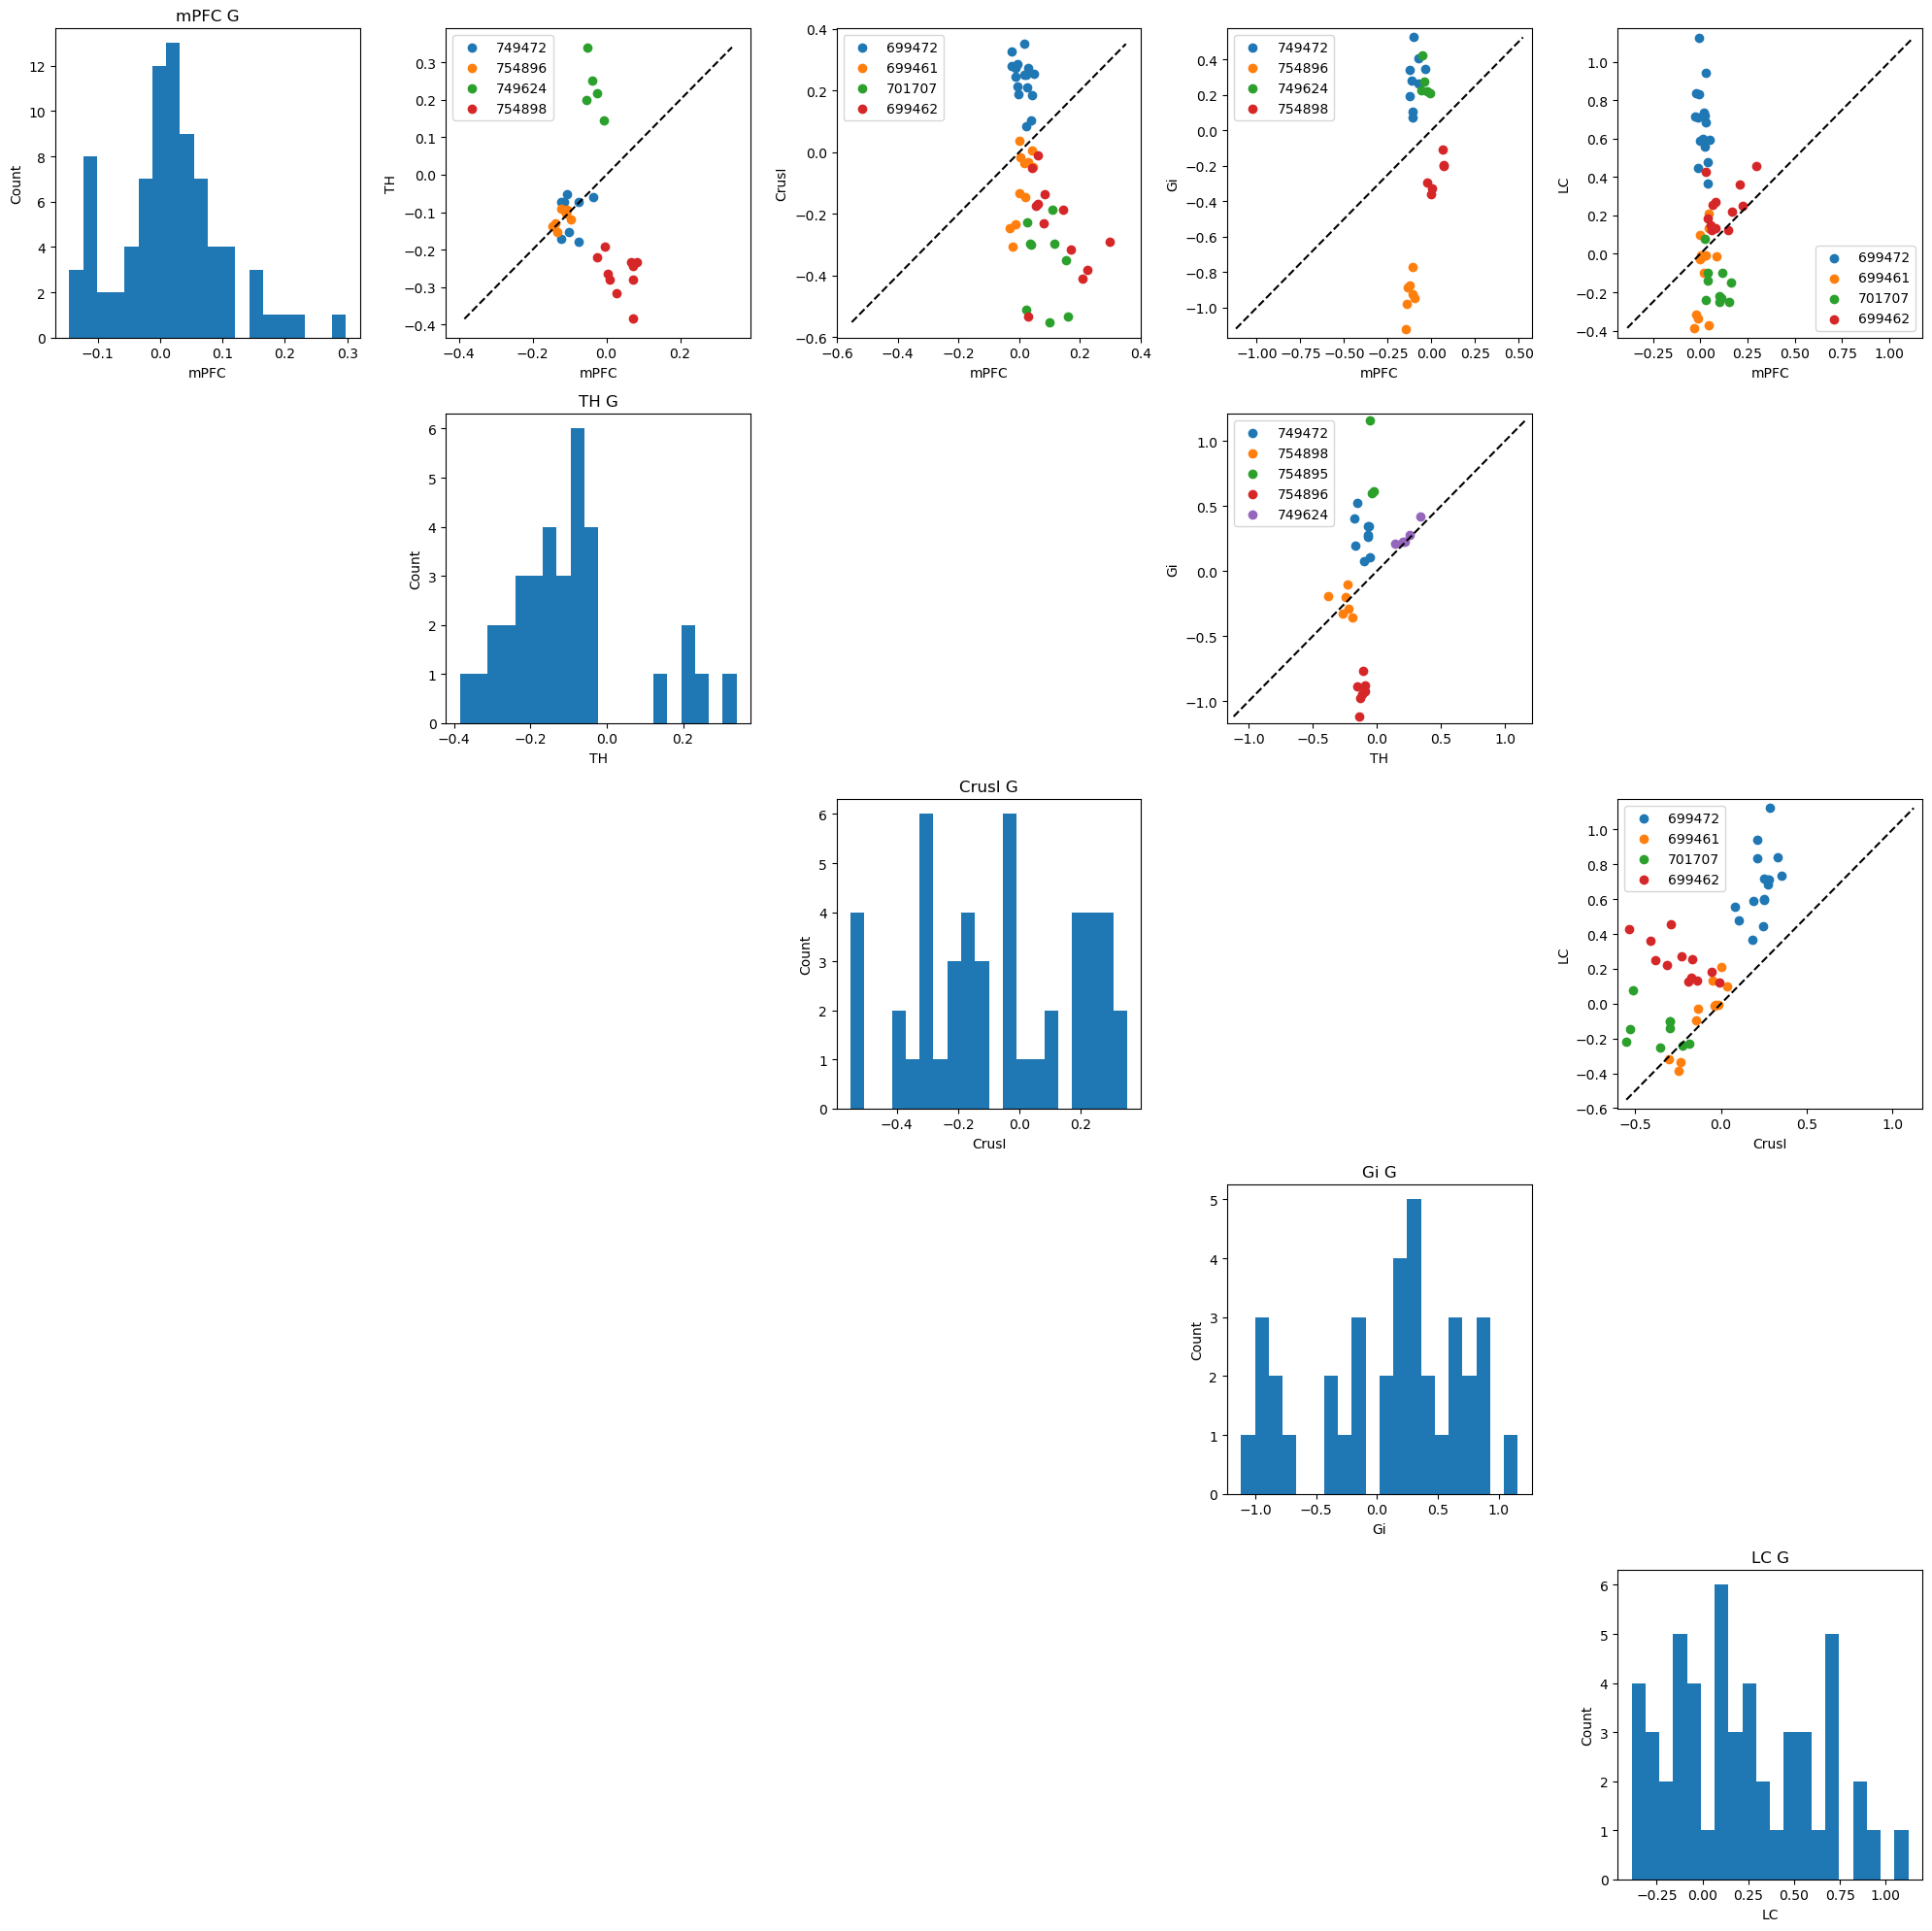

In [192]:
# Iso L and R
curr_focus = iso
def operation(x):
    return 0.5*(x[0]+x[1])
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(len(region_list), len(region_list), figure=fig)
for ind1, region_1 in enumerate(region_list):
    for ind2, region_2 in enumerate(region_list):
        curr_df = curr_focus[curr_focus[region_1].notnull() & curr_focus[region_2].notnull() & G_filter[region_1] & G_filter[region_2]]
        if len(curr_df) > 0:
            if ind1 < ind2:
                print(f'Printing {region_1} vs {region_2} {len(curr_df)} sessions')
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                region_2_values = curr_df[region_2].apply(operation)
                aniIDs = [parse_session_string(x)['aniName'] for x in curr_df['session']]
                aniIDs_set = set(aniIDs)
                aniIDs = np.array(aniIDs)
                for aniID in aniIDs_set:
                    region_1_values_ani = region_1_values[aniIDs == aniID]
                    region_2_values_ani = region_2_values[aniIDs == aniID]
                    plt.scatter(region_1_values_ani, region_2_values_ani, label=aniID)
                plt.legend()
                plt.plot([np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], [np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], color='black', linestyle='--') 
                plt.xlim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylabel(region_2)
                plt.xlabel(region_1)
            elif ind1 == ind2:
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                plt.hist(region_1_values, bins=20)
                plt.xlabel(region_1)
                plt.ylabel('Count')
                plt.title(f'{region_1} G')
            
plt.tight_layout()
# plt.suptitle(f'{region_1} vs {region_2} G')

Printing mPFC vs TH 31 sessions
Printing mPFC vs CrusI 48 sessions
Printing mPFC vs Gi 27 sessions
Printing mPFC vs LC 51 sessions
Printing TH vs Gi 30 sessions
Printing CrusI vs LC 48 sessions


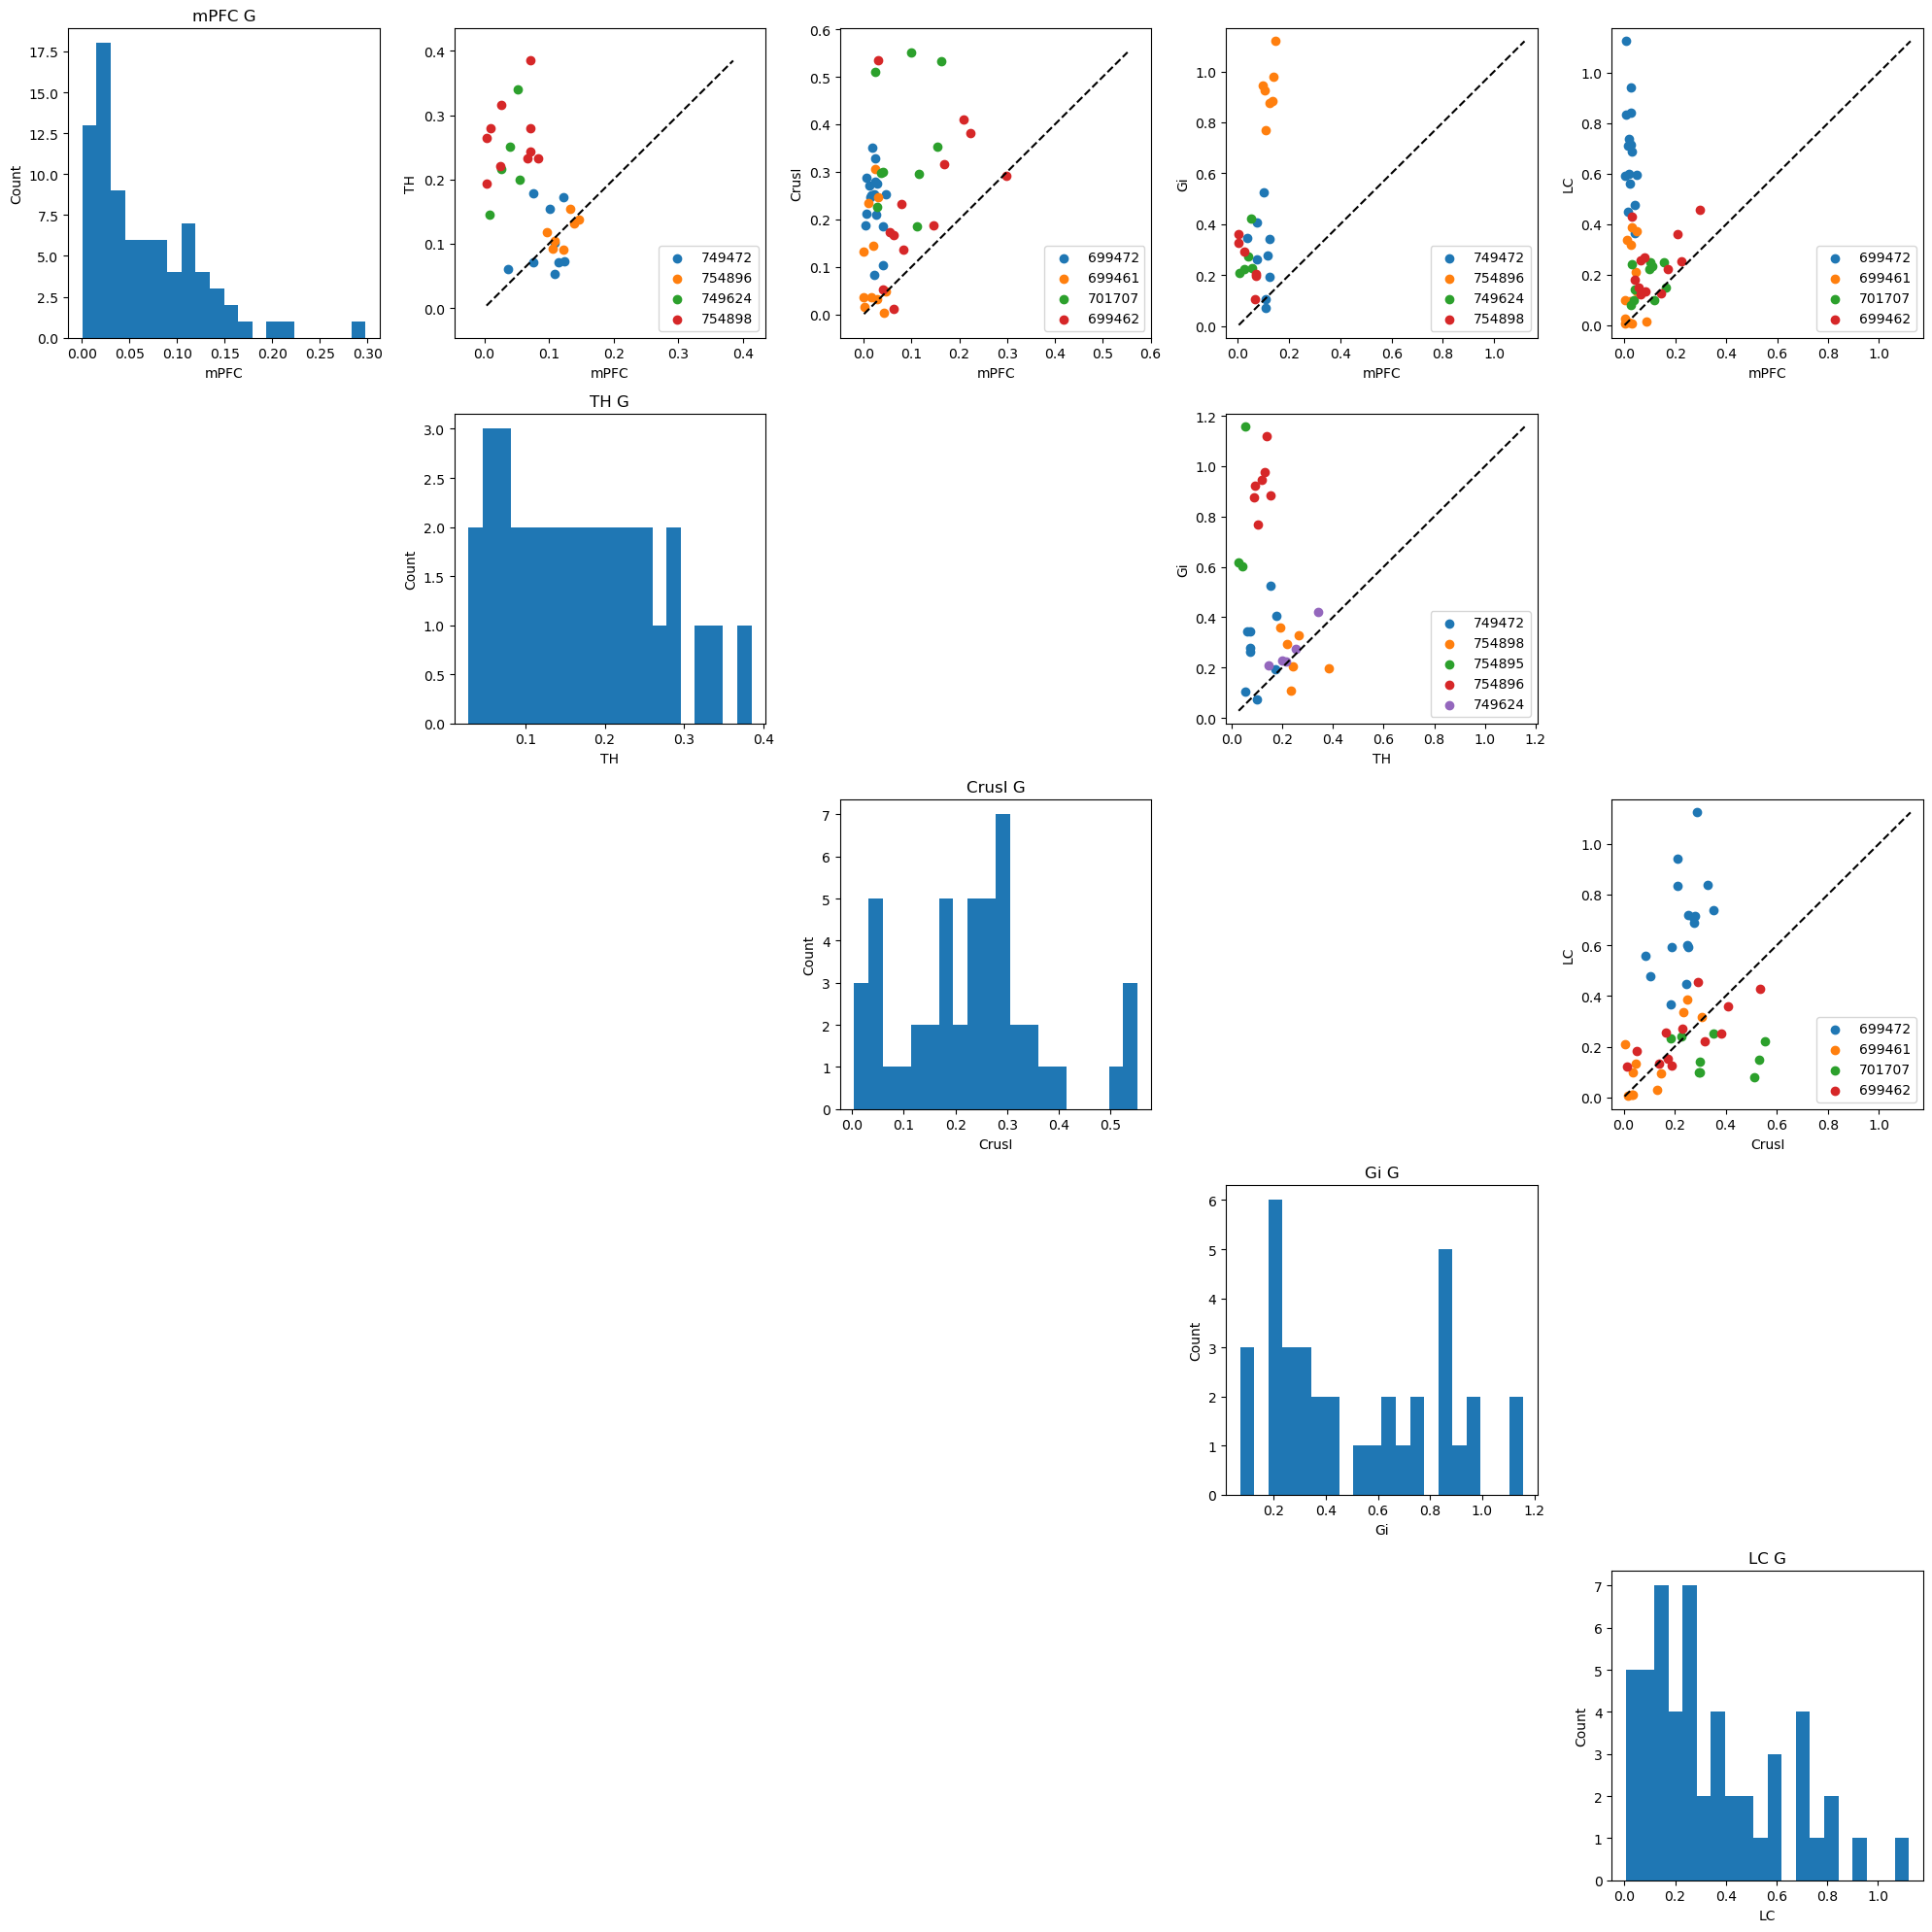

In [193]:
# Iso L and R absolute
curr_focus = iso
def operation(x):
    return np.abs(0.5*(x[0]+x[1]))
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(len(region_list), len(region_list), figure=fig)
for ind1, region_1 in enumerate(region_list):
    for ind2, region_2 in enumerate(region_list):
        curr_df = curr_focus[curr_focus[region_1].notnull() & curr_focus[region_2].notnull() & G_filter[region_1] & G_filter[region_2]]
        if len(curr_df) > 0:
            if ind1 < ind2:
                print(f'Printing {region_1} vs {region_2} {len(curr_df)} sessions')
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                region_2_values = curr_df[region_2].apply(operation)
                aniIDs = [parse_session_string(x)['aniName'] for x in curr_df['session']]
                aniIDs_set = set(aniIDs)
                aniIDs = np.array(aniIDs)
                for aniID in aniIDs_set:
                    region_1_values_ani = region_1_values[aniIDs == aniID]
                    region_2_values_ani = region_2_values[aniIDs == aniID]
                    plt.scatter(region_1_values_ani, region_2_values_ani, label=aniID)
                plt.legend()
                plt.plot([np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], [np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], color='black', linestyle='--') 
                plt.xlim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylabel(region_2)
                plt.xlabel(region_1)
            elif ind1 == ind2:
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                plt.hist(region_1_values, bins=20)
                plt.xlabel(region_1)
                plt.ylabel('Count')
                plt.title(f'{region_1} G')
            
plt.tight_layout()
# plt.suptitle(f'{region_1} vs {region_2} G')

Printing mPFC vs TH 31 sessions
Printing mPFC vs CrusI 48 sessions
Printing mPFC vs Gi 27 sessions
Printing mPFC vs LC 51 sessions
Printing TH vs Gi 30 sessions
Printing CrusI vs LC 48 sessions


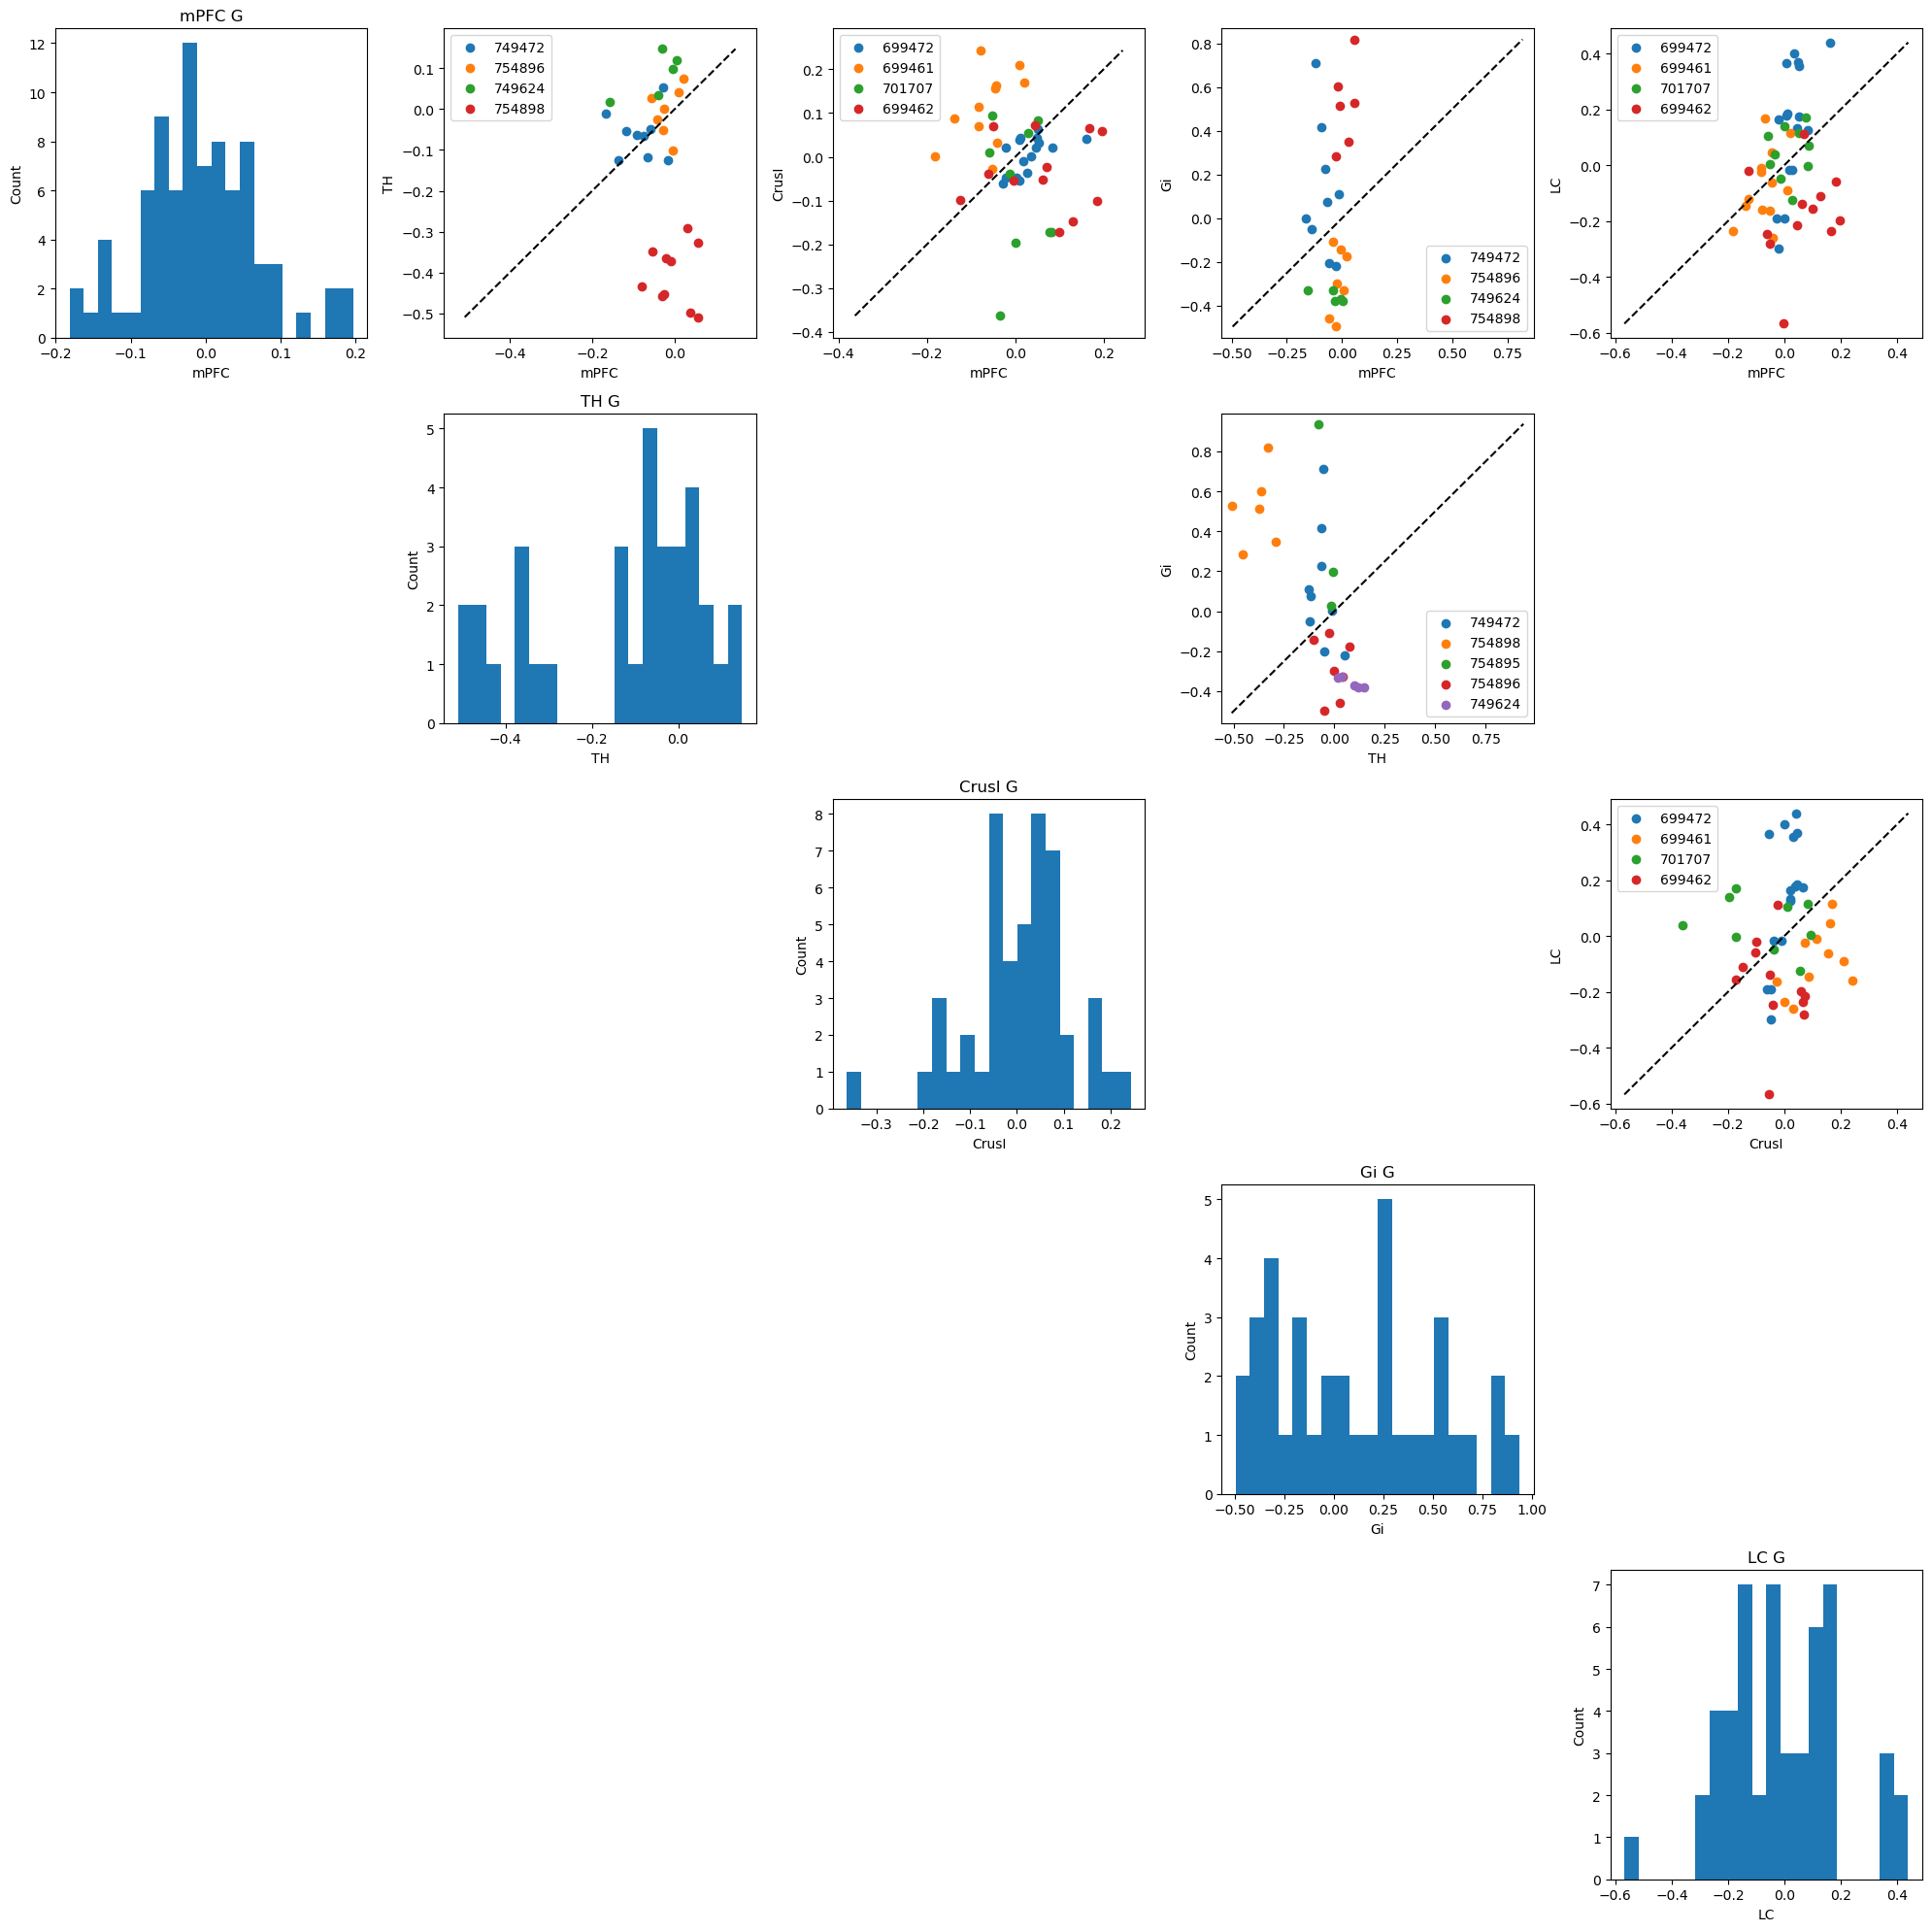

In [194]:
# Iso L vs R
curr_focus = iso
def operation(x):
    return x[0]-x[1]
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(len(region_list), len(region_list), figure=fig)
for ind1, region_1 in enumerate(region_list):
    for ind2, region_2 in enumerate(region_list):
        curr_df = curr_focus[curr_focus[region_1].notnull() & curr_focus[region_2].notnull() & G_filter[region_1] & G_filter[region_2]]
        if len(curr_df) > 0:
            if ind1 < ind2:
                print(f'Printing {region_1} vs {region_2} {len(curr_df)} sessions')
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                region_2_values = curr_df[region_2].apply(operation)
                aniIDs = [parse_session_string(x)['aniName'] for x in curr_df['session']]
                aniIDs_set = set(aniIDs)
                aniIDs = np.array(aniIDs)
                for aniID in aniIDs_set:
                    region_1_values_ani = region_1_values[aniIDs == aniID]
                    region_2_values_ani = region_2_values[aniIDs == aniID]
                    plt.scatter(region_1_values_ani, region_2_values_ani, label=aniID)
                plt.legend()
                plt.plot([np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], [np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], color='black', linestyle='--') 
                plt.xlim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylabel(region_2)
                plt.xlabel(region_1)
            elif ind1 == ind2:
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                plt.hist(region_1_values, bins=20)
                plt.xlabel(region_1)
                plt.ylabel('Count')
                plt.title(f'{region_1} G')
            
plt.tight_layout()
# plt.suptitle(f'{region_1} vs {region_2} G')

Printing mPFC vs TH 31 sessions
Printing mPFC vs CrusI 48 sessions
Printing mPFC vs Gi 27 sessions
Printing mPFC vs LC 51 sessions
Printing TH vs Gi 30 sessions
Printing CrusI vs LC 48 sessions


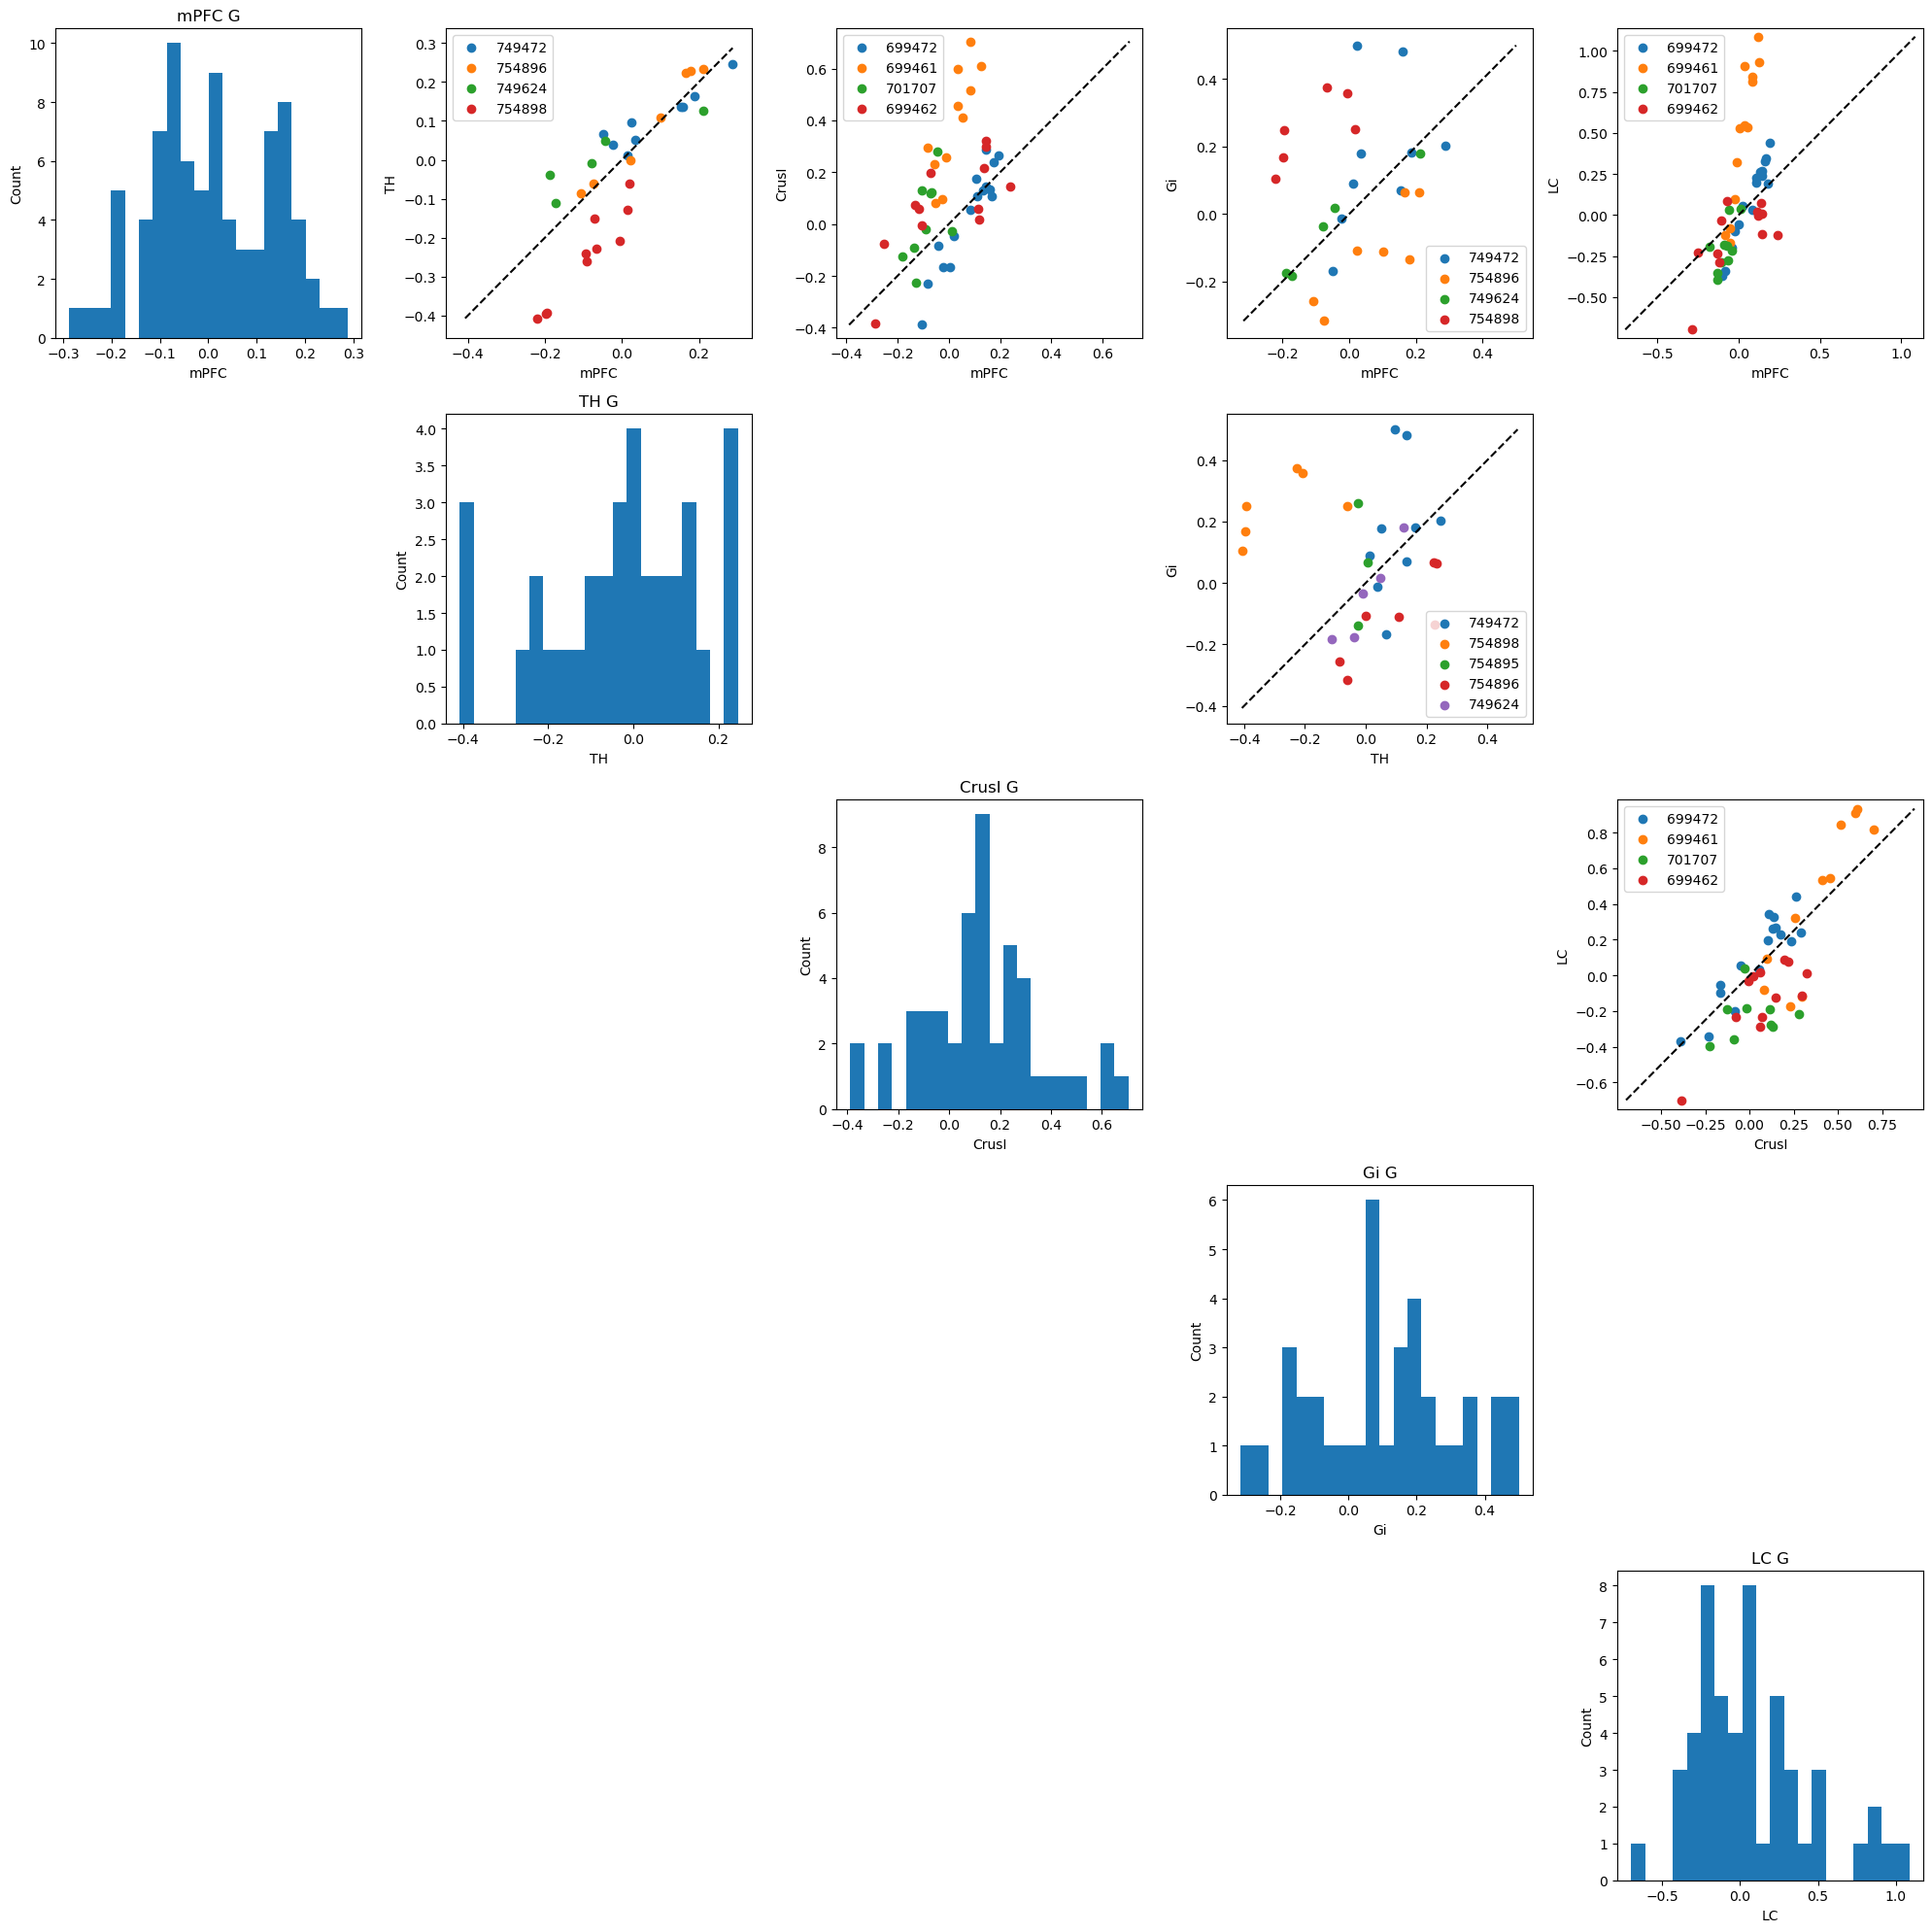

In [195]:
# G: L vs R
curr_focus = G
def operation(x):
    return x[0]-x[1]
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(len(region_list), len(region_list), figure=fig)
for ind1, region_1 in enumerate(region_list):
    for ind2, region_2 in enumerate(region_list):
        curr_df = curr_focus[curr_focus[region_1].notnull() & curr_focus[region_2].notnull() & G_filter[region_1] & G_filter[region_2]]
        if len(curr_df) > 0:
            if ind1 < ind2:
                print(f'Printing {region_1} vs {region_2} {len(curr_df)} sessions')
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                region_2_values = curr_df[region_2].apply(operation)
                aniIDs = [parse_session_string(x)['aniName'] for x in curr_df['session']]
                aniIDs_set = set(aniIDs)
                aniIDs = np.array(aniIDs)
                for aniID in aniIDs_set:
                    region_1_values_ani = region_1_values[aniIDs == aniID]
                    region_2_values_ani = region_2_values[aniIDs == aniID]
                    plt.scatter(region_1_values_ani, region_2_values_ani, label=aniID)
                plt.legend()
                plt.plot([np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], [np.min([region_1_values, region_2_values]), np.max([region_1_values, region_2_values])], color='black', linestyle='--') 
                plt.xlim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylim([np.min([region_1_values, region_2_values])-0.05, np.max([region_1_values, region_2_values])+0.05])
                plt.ylabel(region_2)
                plt.xlabel(region_1)
            elif ind1 == ind2:
                ax = fig.add_subplot(gs[ind1, ind2])
                region_1_values = curr_df[region_1].apply(operation)
                plt.hist(region_1_values, bins=20)
                plt.xlabel(region_1)
                plt.ylabel('Count')
                plt.title(f'{region_1} G')
            
plt.tight_layout()
# plt.suptitle(f'{region_1} vs {region_2} G')
                

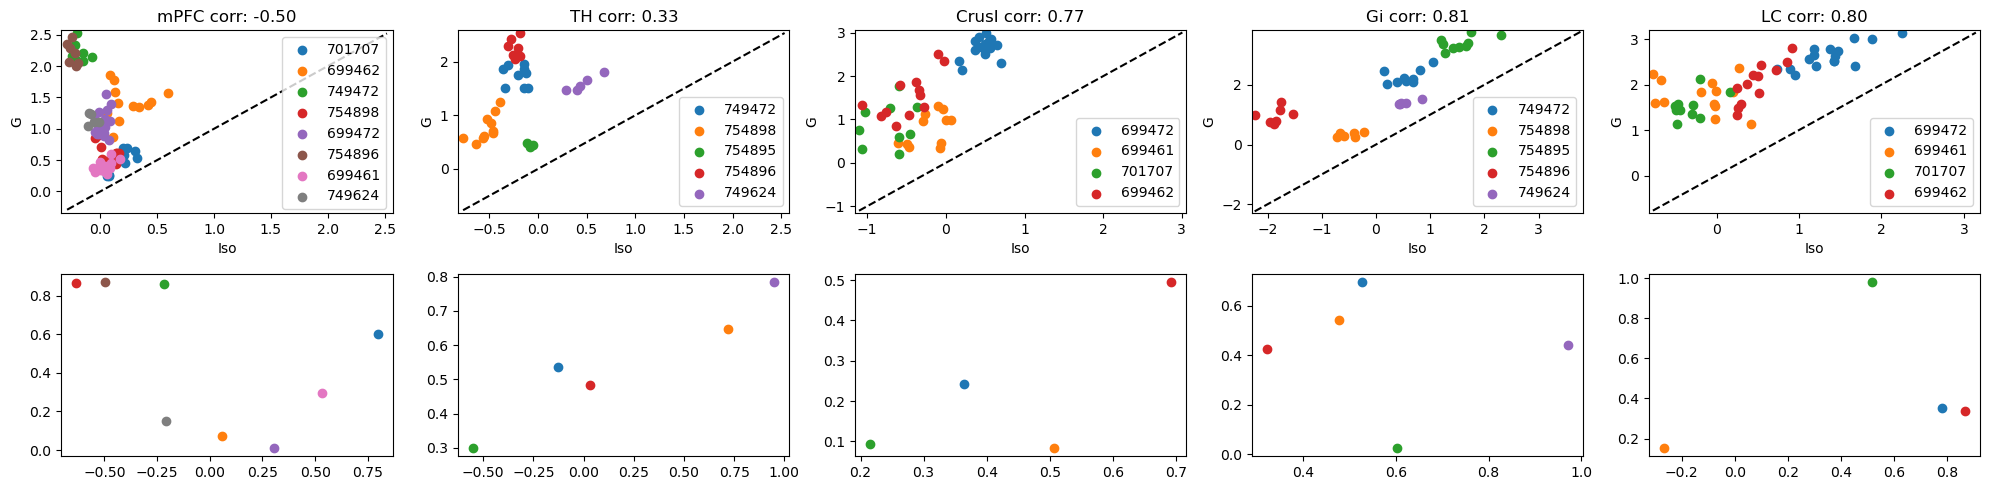

In [229]:
# Iso L and R vs G L and R
curr_focus = iso
def operation(x):
    return x[0]+x[1]
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(2, len(region_list), figure=fig)
for ind1, region_1 in enumerate(region_list):
    curr_df_iso = iso[G[region_1].notnull() & G_filter[region_1]]
    curr_df_G = G[G[region_1].notnull() & G_filter[region_1]]
    if len(curr_df_iso) > 0:
        # print(f'Printing {region_1} iso vs G in {len(curr_df_G)} sessions')
        ax1 = fig.add_subplot(gs[0, ind1])
        ax2 = fig.add_subplot(gs[1, ind1])
        iso_values = curr_df_iso[region_1].apply(operation)
        G_values = curr_df_G[region_1].apply(operation)
        aniIDs = [parse_session_string(x)['aniName'] for x in curr_df_iso['session']]
        aniIDs_set = set(aniIDs)
        aniIDs = np.array(aniIDs)
        corr_anis = []
        rand_num = np.random.rand(len(aniIDs_set))
        for ind, aniID in enumerate(aniIDs_set):
            iso_values_ani = iso_values[aniIDs == aniID]
            G_values_ani = G_values[aniIDs == aniID]
            ax1.scatter(iso_values_ani, G_values_ani, label=aniID)
            # calculate correlation between iso and G
            corr_matrix = np.corrcoef(iso_values_ani, G_values_ani)
            ax2.scatter(corr_matrix[0, 1], rand_num[ind], label=aniID)
        
        # ax2.legend()   
        ax1.legend()
        ax1.plot([np.min([iso_values, G_values]), np.max([iso_values, G_values])], [np.min([iso_values, G_values]), np.max([iso_values, G_values])], color='black', linestyle='--') 
        ax1.set_xlim([np.min([iso_values, G_values])-0.05, np.max([iso_values, G_values])+0.05])
        ax1.set_ylim([np.min([iso_values, G_values])-0.05, np.max([iso_values, G_values])+0.05])
        ax1.set_ylabel('G')
        ax1.set_xlabel('Iso')
        corr_matrix = np.corrcoef(G_values, iso_values)
        ax1.set_title(f'{region_1} corr: {corr_matrix[0, 1]:.2f}') 

            
plt.tight_layout()
# plt.suptitle(f'{region_1} vs {region_2} G')

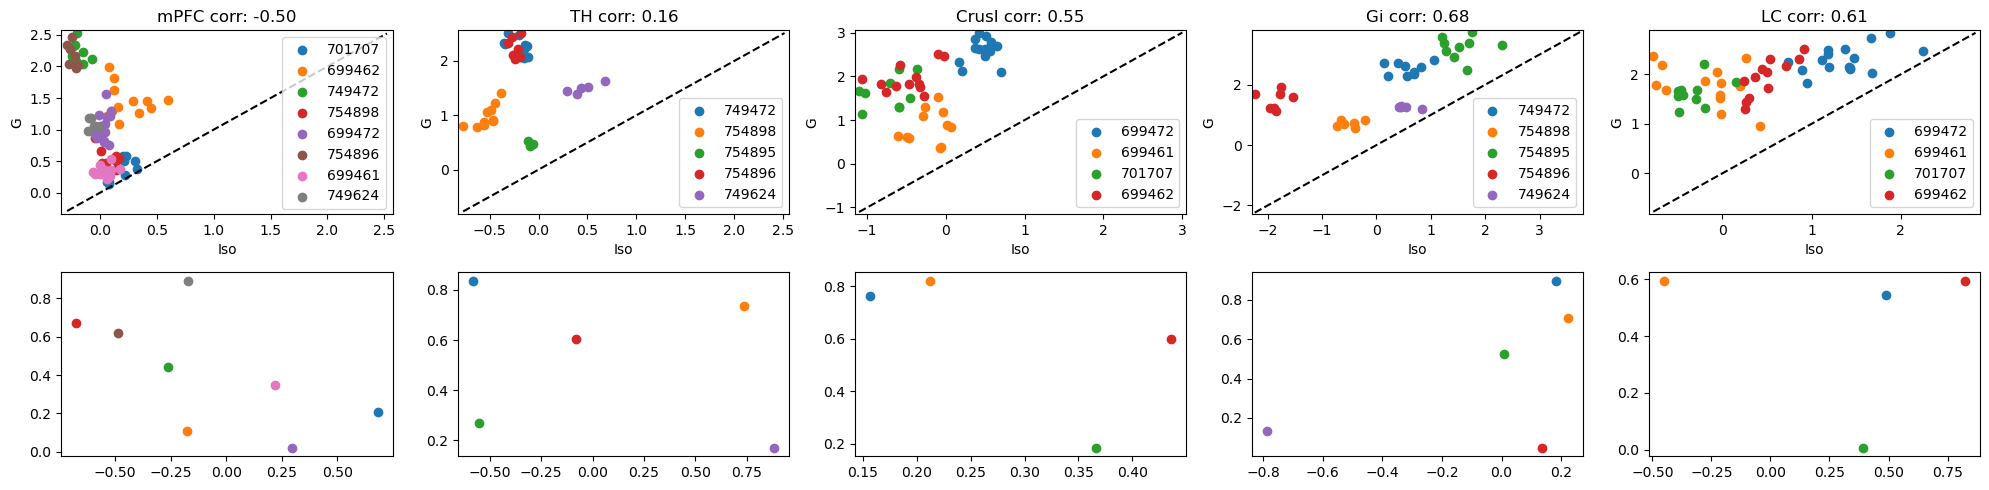

In [230]:
# Iso L and R vs G_mc L and R
curr_focus = iso
def operation(x):
    return x[0]+x[1]
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(2, len(region_list), figure=fig)
for ind1, region_1 in enumerate(region_list):
    curr_df_iso = iso[G[region_1].notnull() & G_filter[region_1]]
    curr_df_G = G_mc[G[region_1].notnull() & G_filter[region_1]]
    if len(curr_df_iso) > 0:
        # print(f'Printing {region_1} iso vs G in {len(curr_df_G)} sessions')
        ax1 = fig.add_subplot(gs[0, ind1])
        ax2 = fig.add_subplot(gs[1, ind1])
        iso_values = curr_df_iso[region_1].apply(operation)
        G_values = curr_df_G[region_1].apply(operation)
        aniIDs = [parse_session_string(x)['aniName'] for x in curr_df_iso['session']]
        aniIDs_set = set(aniIDs)
        aniIDs = np.array(aniIDs)
        corr_anis = []
        rand_num = np.random.rand(len(aniIDs_set))
        for ind, aniID in enumerate(aniIDs_set):
            iso_values_ani = iso_values[aniIDs == aniID]
            G_values_ani = G_values[aniIDs == aniID]
            ax1.scatter(iso_values_ani, G_values_ani, label=aniID)
            # calculate correlation between iso and G
            corr_matrix = np.corrcoef(iso_values_ani, G_values_ani)
            ax2.scatter(corr_matrix[0, 1], rand_num[ind], label=aniID)
        
        # ax2.legend()   
        ax1.legend()
        ax1.plot([np.min([iso_values, G_values]), np.max([iso_values, G_values])], [np.min([iso_values, G_values]), np.max([iso_values, G_values])], color='black', linestyle='--') 
        ax1.set_xlim([np.min([iso_values, G_values])-0.05, np.max([iso_values, G_values])+0.05])
        ax1.set_ylim([np.min([iso_values, G_values])-0.05, np.max([iso_values, G_values])+0.05])
        ax1.set_ylabel('G')
        ax1.set_xlabel('Iso')
        corr_matrix = np.corrcoef(G_values, iso_values)
        ax1.set_title(f'{region_1} corr: {corr_matrix[0, 1]:.2f}') 

            
plt.tight_layout()
# plt.suptitle(f'{region_1} vs {region_2} G')

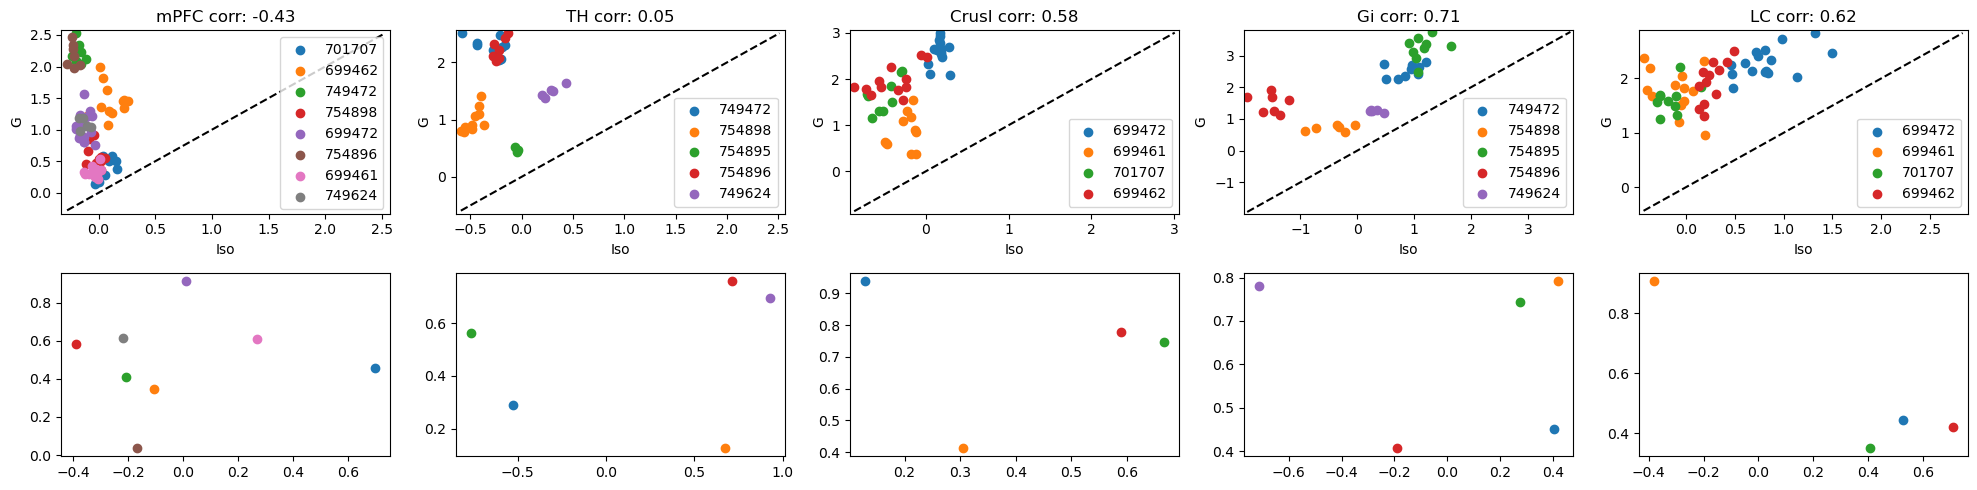

In [231]:
# Iso_mc L and R vs G_mc L and R
def operation(x):
    return x[0]+x[1]
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(2, len(region_list), figure=fig)
for ind1, region_1 in enumerate(region_list):
    curr_df_iso = iso_mc[G[region_1].notnull() & G_filter[region_1]]
    curr_df_G = G_mc[G[region_1].notnull() & G_filter[region_1]]
    if len(curr_df_iso) > 0:
        # print(f'Printing {region_1} iso vs G in {len(curr_df_G)} sessions')
        ax1 = fig.add_subplot(gs[0, ind1])
        ax2 = fig.add_subplot(gs[1, ind1])
        iso_values = curr_df_iso[region_1].apply(operation)
        G_values = curr_df_G[region_1].apply(operation)
        aniIDs = [parse_session_string(x)['aniName'] for x in curr_df_iso['session']]
        aniIDs_set = set(aniIDs)
        aniIDs = np.array(aniIDs)
        corr_anis = []
        rand_num = np.random.rand(len(aniIDs_set))
        for ind, aniID in enumerate(aniIDs_set):
            iso_values_ani = iso_values[aniIDs == aniID]
            G_values_ani = G_values[aniIDs == aniID]
            ax1.scatter(iso_values_ani, G_values_ani, label=aniID)
            # calculate correlation between iso and G
            corr_matrix = np.corrcoef(iso_values_ani, G_values_ani)
            ax2.scatter(corr_matrix[0, 1], rand_num[ind], label=aniID)
        
        # ax2.legend()   
        ax1.legend()
        ax1.plot([np.min([iso_values, G_values]), np.max([iso_values, G_values])], [np.min([iso_values, G_values]), np.max([iso_values, G_values])], color='black', linestyle='--') 
        ax1.set_xlim([np.min([iso_values, G_values])-0.05, np.max([iso_values, G_values])+0.05])
        ax1.set_ylim([np.min([iso_values, G_values])-0.05, np.max([iso_values, G_values])+0.05])
        ax1.set_ylabel('G')
        ax1.set_xlabel('Iso')
        corr_matrix = np.corrcoef(G_values, iso_values)
        ax1.set_title(f'{region_1} corr: {corr_matrix[0, 1]:.2f}') 

            
plt.tight_layout()
# plt.suptitle(f'{region_1} vs {region_2} G')